# <center>  TP 1 de traitement avancé du signal et des images : Transformée de Fourier à Temps discret et Transformée de Fourier Discrete

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Partie I : Transformée de Fourier à temps discret d'une porte

## Rappels de cours

Nous avons vu en CM/TD que la Transformée de Fourier à Temps Discret (TFTD) d'une porte sur N points est donnée par:

$$P(f) = \sum_{n=0}^{N-1} p[n]\exp^{-2j\pi n\frac{f}{f_e} }, \quad P(f) = \frac{\sin \pi N f/f_e}{\sin \pi f/f_e}\exp^{-j(N-1)\pi\frac{f}{f_e}}$$

où $f_e$ est la fréquence d'échantillonnage et $N$ est le nombre de points de la porte.
Comme $P(f)$ est défini quel que soit $f$, on peut l'implémenter sous la forme d'une fonction, qui prend en entrée la valeur de $f$ et retourne $P(f)$. 

Coder cette fonction dans la cellule ci-dessous en respectant le prototype imposé. Vous prendrez garde aux valeurs particulières qui annulent le dénominateur.

In [3]:
def fonctionTFTDporte(f, N, fe):
    """
    retourne pour une fréquence f la valeur scalaire de la 
    transformée de Fourier à temps discret (TFTD) 
    d'une porte échantillonnée sur N points à une fréquence 
    d'échantillonnage fe.

    Parameters:
    - f (float): Fréquence pour laquelle calculer la TFTD.
    - N (int): Nombre d'échantillons du signal de porte.
    - fe (float): Fréquence d'échantillonnage du signal.

    Returns:
    -  (float): Valeur scalaire de la TFTD pour la fréquence donnée.
    """

    numerateur = np.sin(np.pi * N * f / fe)
    denominateur = np.sin(np.pi * f / fe)

    if np.abs(denominateur) < 1e-10:
        return N
    else:
        p_de_f = (numerateur / denominateur) *  np.exp(-1j * (N-1) * np.pi * (f / fe))
        return p_de_f
    
f = 5
N = 10
fe = 100

p_de_f = fonctionTFTDporte(f,N,fe)
p_de_f

(1.0000000000000004-6.313751514675044j)

Une propriété importante vue en cours est que $P(f)$ est périodique de période $f_e$.
On pourra donc se limiter à son calcul sur une seule période. 

On vous demande maintenant d'utiliser la fonction définie ci-dessus pour afficher la TFTD d'un signal qui vaut $1$ pour $k \in [0,N-1]$  Vous tracerez les valeurs de TFTD sur une figure sur laquelle l'axe des abscisses représentera les fréquences normalisées ($f/f_e$).

Le résultat attendu est le suivant : 

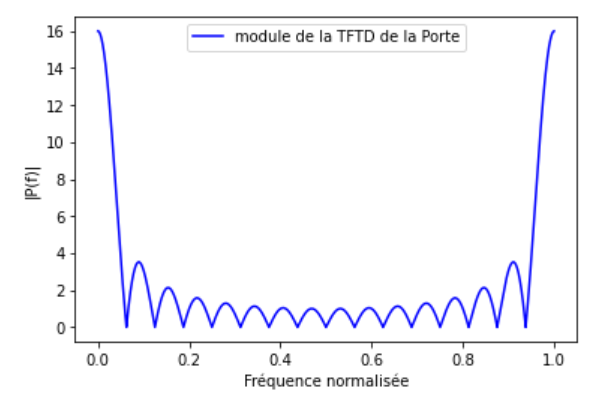

A vous de l'obtenir dans la cellule suivante

<Figure size 1000x600 with 0 Axes>

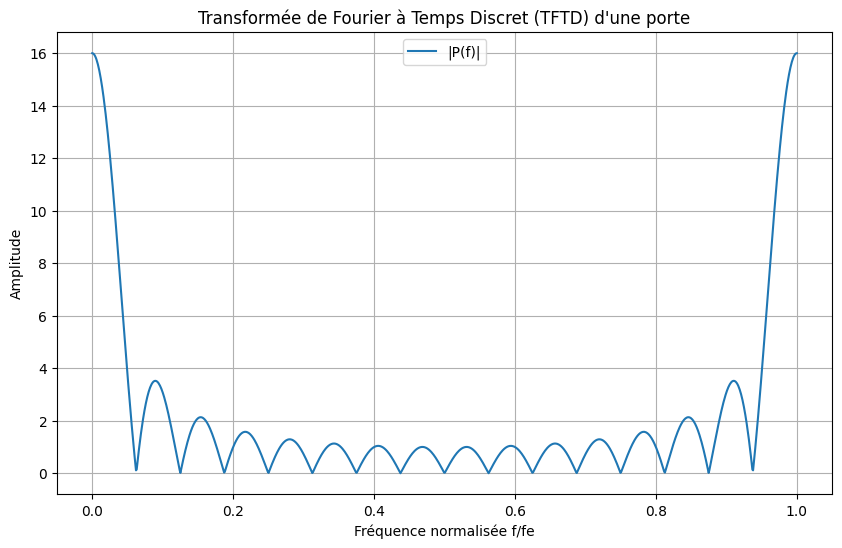

In [4]:
#Paramètres du problème

N= 16
fe = 4096

frequences = np.linspace(0, fe, 1000)

# Construction du tableau des valeurs de P(f)

p_de_f = np.array([fonctionTFTDporte(f, N, fe) for f in frequences])



# Tracé du spectre d'amplitude

plt.figure(figsize=(10,6))

plt.figure(figsize=(10, 6))
plt.plot(frequences / fe, np.abs(p_de_f), label="|P(f)|")
plt.title("Transformée de Fourier à Temps Discret (TFTD) d'une porte")
plt.xlabel("Fréquence normalisée f/fe")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


# Partie II : Transformée de Fourier Discrète d'une porte

Une Transformée de Fourier Discrète (TFD) d'un signal, définie par 
$$
P[k/L] = \sum_{n=0}^{N-1} p[n]\exp^{-2j\pi n (k/L)}
$$
est le résultat d'un échantillonage sur $L$  points de la TFTD du signal. 

On considèrera ici $L=N$ (i.e. on prend autant de points en fréquence qu'en temporel) et on écrira $P[k]$ plutôt que $P[k/L]$
$$
P[k] = \sum_{n=0}^{N-1} x[n]\exp^{-2j\pi n (k/N)}
$$
Dans le cas de la fonction porte, on a donc :
$$
\quad P[k/L] = \frac{\sin \pi N k/L}{\sin \pi k/L}\exp^{-j(N-1)\pi\frac{k}{L}}
$$
ou encore après les simplifications ci-dessus :
$$
, \quad P[k] = \frac{\sin \pi k}{\sin \pi k/N} \exp^{-j(N-1)\pi\frac{k}{N}}=N \delta[0].
$$

Dans la partie suivante, on cherche à vérifier que l'échantillonnage de la TFTD obtenue dans la première partie correspond bien au résultat théorique ci-dessus et aux résultats obtenus par un calcul de TFD par la fonction python np.fft.fft qui permet le calcul de la TFD.

On vous demande pour cela de superposer, sur une même figure : 
- la courbe de TFTD obtenu dans la première partie
- le résultat du calcul de TFD par échantillonage de la TFTD
- le résultat obtenu par un calcul via la fonction fft

Le premier affichage sera en continu (plot), les deux autres en discrêt (scatter)



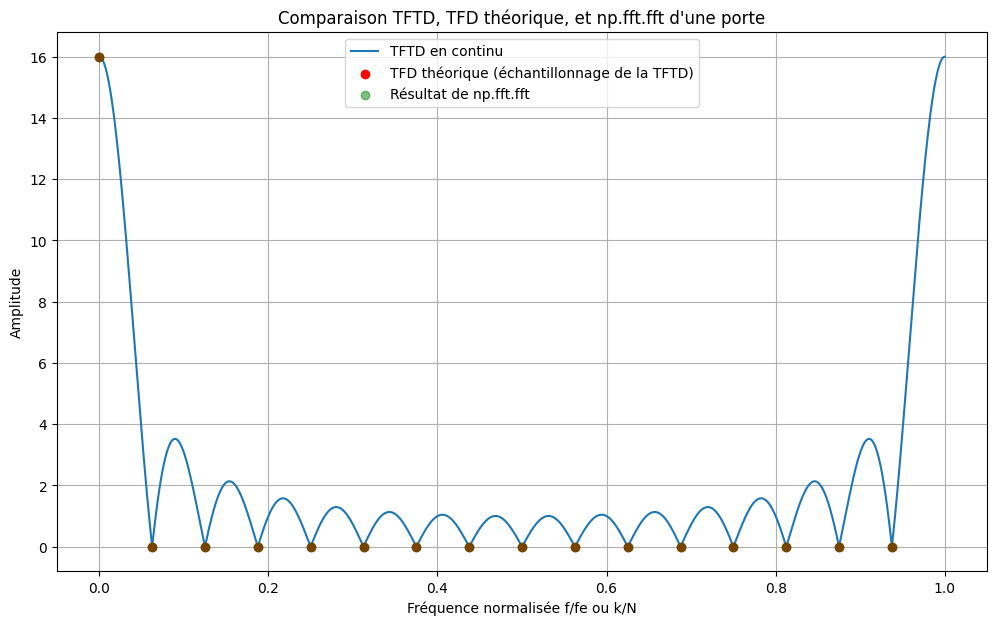

In [5]:
# Affichage de la TFTD de la porte (reprendre l'affichage de la partie 1)

signal_porte = np.ones(N)

# Calcul de la FFT du signal
fft_resultat = np.fft.fft(signal_porte)

k = np.arange(N)

p_de_k_th = np.array([N if ki == 0 else 0 for ki in k])


plt.figure(figsize=(12, 7))

# Affichage de la TFTD de la porte (en continu)
plt.plot(frequences / fe, np.abs(p_de_f), label="TFTD en continu")

# Affichage de la TFD théorique P[k] (en discret)
plt.scatter(k / N, np.abs(p_de_k_th), color='red', label="TFD théorique (échantillonnage de la TFTD)", zorder=5)

# Affichage du résultat de fft (en discret)
plt.scatter(k / N, np.abs(fft_resultat), color='green', label="Résultat de np.fft.fft", alpha=0.5, zorder=5)

plt.title("Comparaison TFTD, TFD théorique, et np.fft.fft d'une porte")
plt.xlabel("Fréquence normalisée f/fe ou k/N")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

Affichage : selon la théorie, les points de TFD se superposent à la courbe de la TFTD 

# Partie III : TFTD du cosinus

## Rappel de cours

La transformée de Fourier d'un signal cosinus $s(t) = \cos(2\pi f_0t)$ de durée infinie est donnée par
$\frac{\delta(f-f_0) + \delta(f+f_0)}{2}$. Son observation à travers une porte discrète conduit alors à
un signal $s(t) \times p[n]$ dont la TFTD est alors 
$$
S_p(f)= \left( \frac{\delta(f-f_0) + \delta(f+f_0)}{2} \right) \ast P(f) = \frac{P(f-f_0) + P(f+f_0)}{2}
$$
Le calcul par un autre chemin est 
$$
S_p(f)= \sum_{n=0}^{N-1} \cos(2\pi n f_0/f_e)\exp^{-2j\pi n\frac{f}{f_e}} = \frac{1}{2} \sum_{n=0}^{N-1} \exp^{2\pi n f_0/f_e}\exp^{-2j\pi n\frac{f}{f_e}} +  \frac{1}{2} \sum_{n=0}^{N-1} \exp^{-2\pi n f_0/f_e}\exp^{-2j\pi n\frac{f}{f_e}}
$$
$$
S_p(f)= \frac{1}{2} \sum_{n=0}^{N-1} (\exp^{-2\pi (f-f_0)/f_e})^n + \frac{1}{2} \sum_{n=0}^{N-1} (\exp^{-2\pi (f+f_0)/f_e})^n = \frac{P(f-f_0)+ P(f+f_0)}{2}
$$

Si on suppose qu'on a limité la durée du signal par une fenêtre rectangulaire, on peut donc construire une fonction calculant la valeur de la TFTD d'un cosinus par utilisation de la fonction porte écrite précédemment.

Compléter la fonction ci-dessous :

In [11]:
def fonctionTFTDcosinus(f, f0, N, fe):
    """
    retourne pour une fréquence f la valeur scalaire de la 
    transformée de Fourier à temps discret (TFTD) 
    d'un signal sinusoidal sur N points à une fréquence d'échantillonnage fe.

    Parameters:
    - f (float): Fréquence pour laquelle calculer la TFTD.
    - f0 (float) : Fréquence du signal cosinus
    - N (int): Nombre d'échantillons du signal de porte.
    - fe (float): Fréquence d'échantillonnage du signal.

    Returns:
    -  (float): Valeur scalaire de la TFTD pour la fréquence donnée.
    """
    expo_f_f0 = np.exp(-2j * np.pi * (f - f0) / fe)
    expo_fplusf0 = np.exp(-2j * np.pi * (f + f0) / fe)
    
    if np.isclose(expo_f_f0, 1):
        sum_minus = N
    else:
        sum_minus = (1 - expo_f_f0**N) / (1 - expo_f_f0)
    
    if np.isclose(expo_fplusf0, 1):
        sum_plus = N
    else:
        sum_plus = (1 - expo_fplusf0**N) / (1 - expo_fplusf0)

    Sp_f = 0.5 * (sum_minus + sum_plus)
    
    return Sp_f

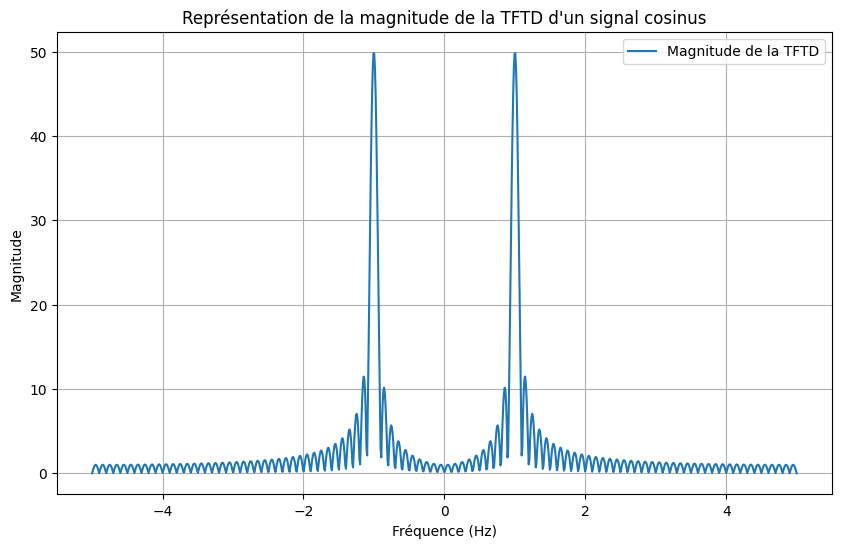

In [17]:
f0 = 1.0  
N = 100   
fe = 10.0 

frequencies = np.linspace(-fe/2, fe/2, 1000)

tftd_values = np.array([fonctionTFTDcosinus(f, f0, N, fe) for f in frequencies])

plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(tftd_values), label='Magnitude de la TFTD')
plt.title('Représentation de la magnitude de la TFTD d\'un signal cosinus')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.show()


In [23]:
def fonctionTFTDcosinus(f, f0, N, fe):
    """
    Retourne pour une fréquence f la valeur scalaire de la 
    transformée de Fourier à temps discret (TFTD) 
    d'un signal sinusoidal sur N points à une fréquence d'échantillonnage fe.

    Parameters:
    - f (float): Fréquence pour laquelle calculer la TFTD.
    - f0 (float): Fréquence du signal cosinus
    - N (int): Nombre d'échantillons du signal de porte.
    - fe (float): Fréquence d'échantillonnage du signal.

    Returns:
    - complex: Valeur scalaire de la TFTD pour la fréquence donnée.
    """
    P_f_minus_f0 = fonctionTFTDporte(f - f0, N, fe)  # P(f - f0)
    P_f_plus_f0 = fonctionTFTDporte(f + f0, N, fe)    # P(f + f0)
    
    S_p_f = (P_f_minus_f0 + P_f_plus_f0) / 2
    
    return S_p_f


f = 100 
f0 = 1.0 
N = 100  
fe = 10.0 


S_p_f = fonctionTFTDcosinus(f, f0, N, fe)
S_p_f


(-3.317929273388297e-13-9.404297048435416e-14j)

Tracer le module de $S_p(f)$ ainsi que celui des deux parties $\frac{P(f-f_0)}{2}$ et $\frac{P(f+f_0)}{2} $ dans des couleurs différentes

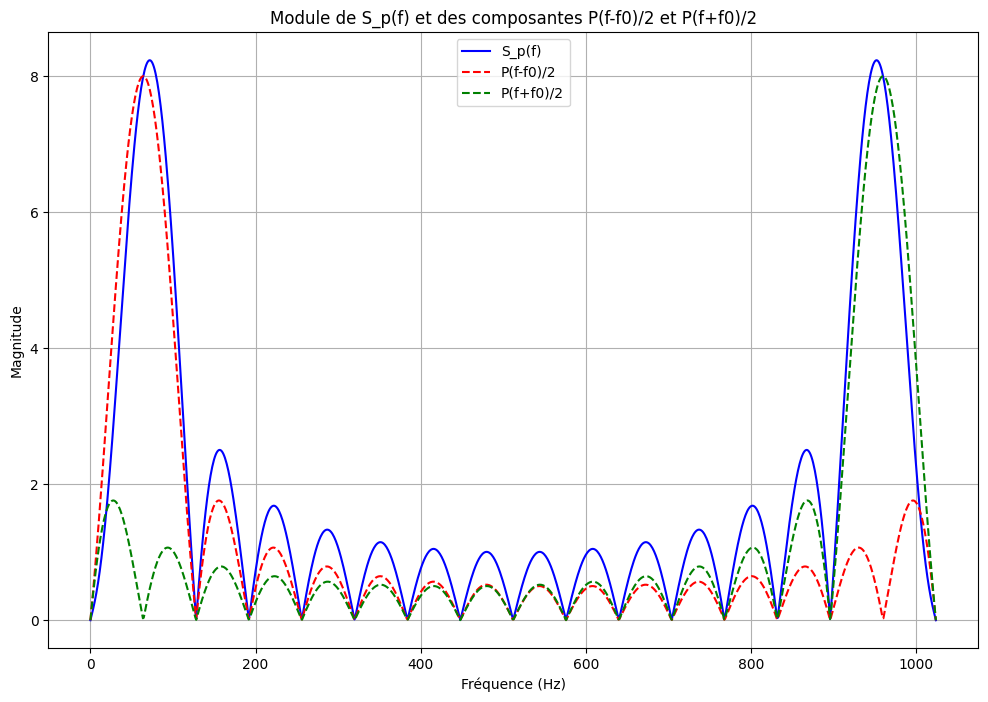

In [25]:
# Paramètres du problème
k = 1
fe = 1024  # Fréquence d'échantillonnage définie précédemment
N = 16  # Nombre d'échantillons également défini précédemment
f0 = k * fe / N  # Calcul de la fréquence du signal cosinus

frequencies = np.linspace(0, fe, 1000)


S_p_f_values = np.array([fonctionTFTDcosinus(f, f0, N, fe) for f in frequencies])
P_f_minus_f0_values = np.array([fonctionTFTDporte(f - f0, N, fe) / 2 for f in frequencies])
P_f_plus_f0_values = np.array([fonctionTFTDporte(f + f0, N, fe) / 2 for f in frequencies])


plt.figure(figsize=(12, 8))
plt.plot(frequencies, np.abs(S_p_f_values), label='S_p(f)', color='blue')
plt.plot(frequencies, np.abs(P_f_minus_f0_values), '--', label='P(f-f0)/2', color='red')
plt.plot(frequencies, np.abs(P_f_plus_f0_values), '--', label='P(f+f0)/2', color='green')

plt.title('Module de S_p(f) et des composantes P(f-f0)/2 et P(f+f0)/2')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

Commenter ici le résultat obtenu, vous prendrez d'abord une valeur de $k$ entière, puis réelle :

% avec k = 1, fe = 1024 Hz, N=16 la frequence du signal cosinus f0 est calculé comme f0=fe/N

% La TFTD montre des pics clairs aux fréquences f0 et -f0 représentant les composantes de fréquence du signal cosinus

% Cela illustre bien la transformation d'un signal cosinus dans le temps en ses composantes fréquentielles distinctes, conformément à la théorie.

# TFD du cosinus

Comme pour la fonction porte, nous cherchons ici à comparer les résultats obtenus par l'échantillonnage de la TFTD du cosinus avec le résultat de la fonction fft.

Dans la cellule suivante, on vous demande 
- de créer un signal échantillonné correspondant à $s(t)$ de durée $N$
- de l'afficher
- d'en calculer la fft

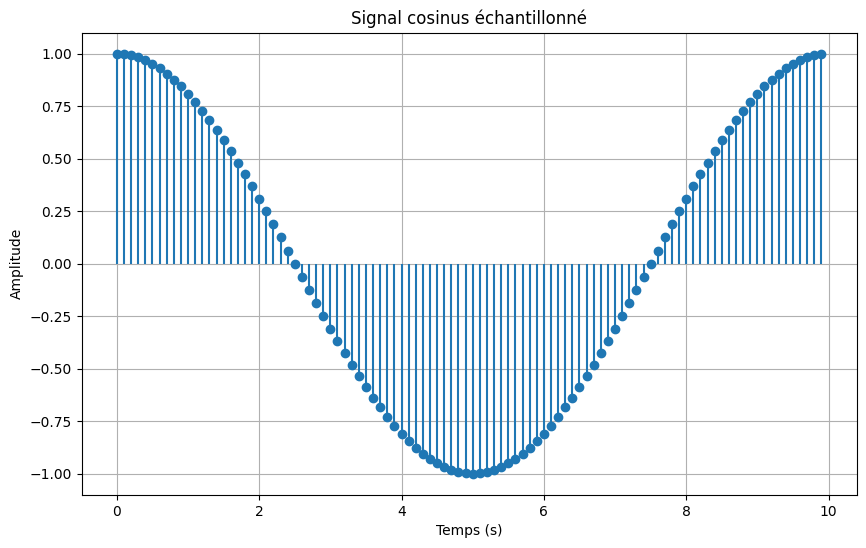

In [27]:
from numpy.fft import fft, fftfreq
import matplotlib.pyplot as plt

fe = 10.0 
N = 100 
f0 = fe / N 
t = np.arange(N) / fe 

s_t = np.cos(2 * np.pi * f0 * t)

plt.figure(figsize=(10, 6))
plt.stem(t, s_t, basefmt=" ")
plt.title('Signal cosinus échantillonné')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()




Dans la cellule suivante, on vous demande maintenant d'afficher en superposition le résultat du calcul de fft avec celui de la TFTD du cosinus obtenu dans la partie III

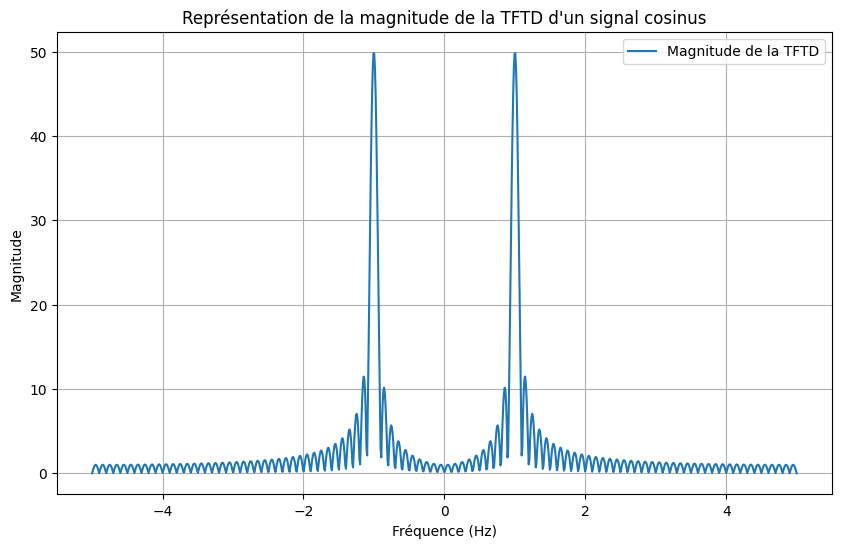

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

In [33]:
# Affichage 

f0 = 1.0  
N = 100   
fe = 10.0 

frequencies = np.linspace(-fe/2, fe/2, 1000)

tftd_values = np.array([fonctionTFTDcosinus(f, f0, N, fe) for f in frequencies])

plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(tftd_values), label='Magnitude de la TFTD')
plt.title('Représentation de la magnitude de la TFTD d\'un signal cosinus')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.show()
fft_result = fft(s_t)
freqs = fftfreq(N, 1/fe)

plt.stem(freqs, np.abs(fft_result), basefmt=" ", use_line_collection=True)
plt.title('Spectre du signal cosinus échantillonné')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


Commenter ici le résultat obtenu, vous prendrez d'abord une valeur de $k$ entière, puis réelle :

%

%

%

%

%

%

La fonction fft de numpy calcule par défaut une TFD sur $N$ points en fréquence (le même nombre de point en temporel qu'en fréquentiel). Elle permet néanmoins de modifier le nombre de points pris en fréquence. Reprendre dans la cellule suivante le code de la précédente en augmentant progressivement le nombre de points pris en fréquence depuis 16 jusqu'à 4096 et en superposant le module de la TFD obtenue avec celui obtenu dans la partie III 

Commenter le résultat précédent 

%

%

%

%

%

%